In [41]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams["figure.dpi"] = 100
np.set_printoptions(precision=3, suppress=True)
from sklearn.model_selection import train_test_split
import pandas as pd

import os
# The file has no headers naming the columns, so we pass header=None
# and provide the column names explicitly in "names"
adult_path = os.path.join("adult.data")
data = pd.read_csv(
    adult_path, header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])
data = data.drop("fnlwgt", axis=1)
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [42]:
data.income.value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [162]:
# I like idempotent cells. If I reused the same name the cell wouldn't run a second time!
income = data.income
data_ = data.drop("income", axis=1)

data_train, data_test, income_train, income_test = train_test_split(data_, income == " >50K", random_state=0, stratify=income)

In [44]:
data.isnull().any()

age               False
workclass         False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
gender            False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
income            False
dtype: bool

In [45]:
data_train.shape

(24420, 13)

In [163]:
data.dtypes

age                int64
workclass         object
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
gender            object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [53]:
continuous = data.columns[data.dtypes == "int64"]

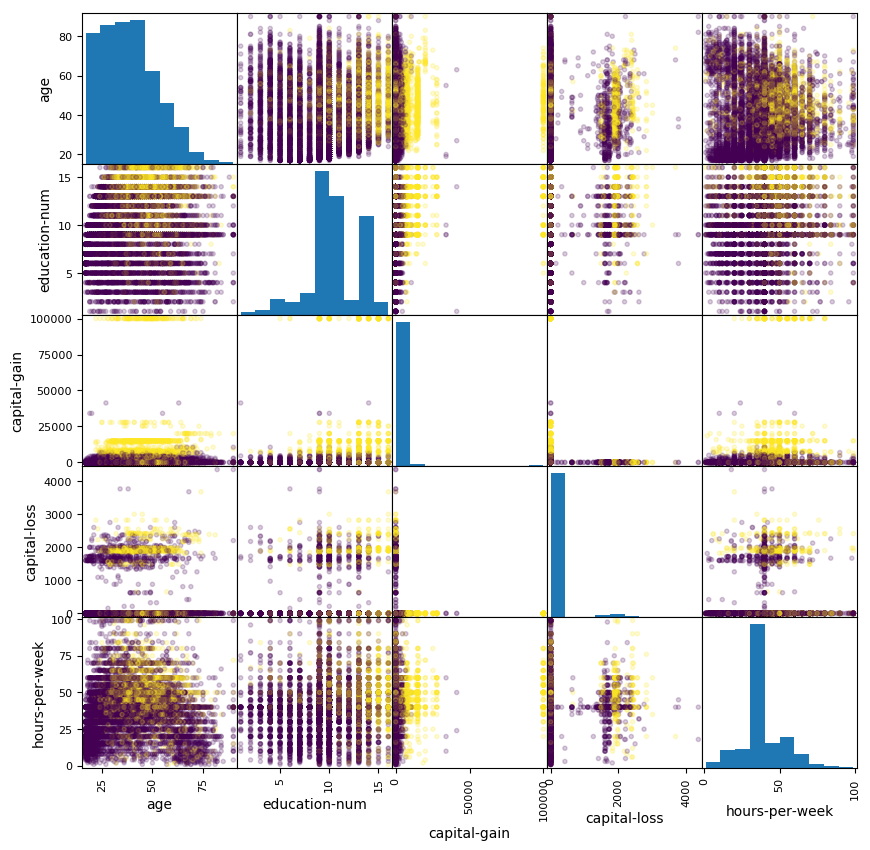

In [54]:
pd.tools.plotting.scatter_matrix(data_train[continuous], c=income_train, alpha=.2, figsize=(10, 10));

In [55]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score

In [103]:
pipe_cont = make_pipeline(StandardScaler(), LogisticRegressionCV())
cross_val_score(log_pipe, data_train[continuous], income_train,
                cv=5, scoring="roc_auc")

array([ 0.84 ,  0.836,  0.83 ,  0.829,  0.825])

In [57]:
cross_val_score(log_pipe, data_train[continuous], income_train, cv=5)

array([ 0.813,  0.82 ,  0.813,  0.814,  0.81 ])

In [58]:
income_train.mean()

0.24082719082719084

In [104]:
pipe_cont.fit(data_train[continuous], income_train)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregressioncv', LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0))])

In [64]:
continuous

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [65]:
pipe_cont.named_steps['logisticregressioncv'].coef_

array([[ 0.585,  0.848,  2.393,  0.278,  0.5  ]])

In [68]:
pipe_cont.named_steps['logisticregressioncv'].intercept_

array([-1.35])

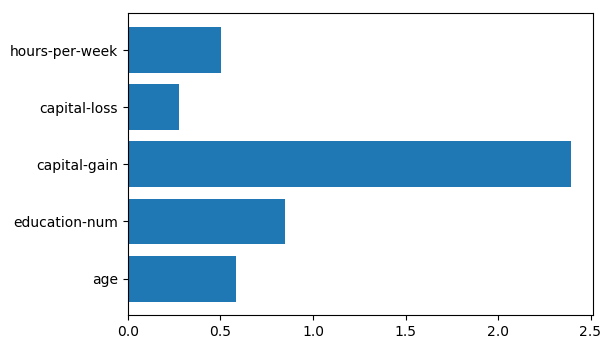

In [105]:
plt.barh(range(len(continuous)), pipe_cont.named_steps['logisticregressioncv'].coef_.ravel())
plt.yticks(range(len(continuous)), continuous);

In [93]:
categorical = data_train.columns[data_train.dtypes != "int64"]

In [94]:
categorical

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object')

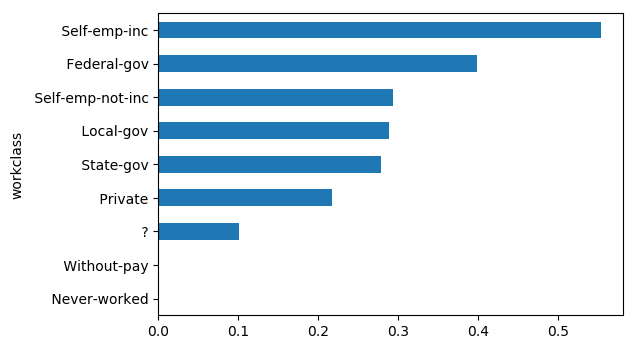

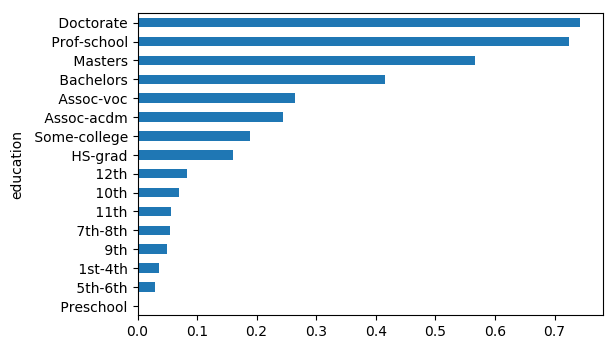

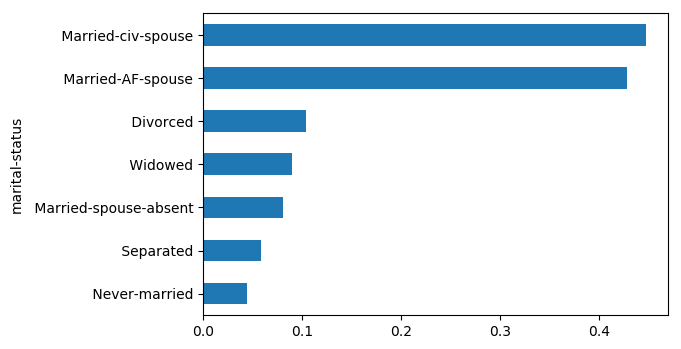

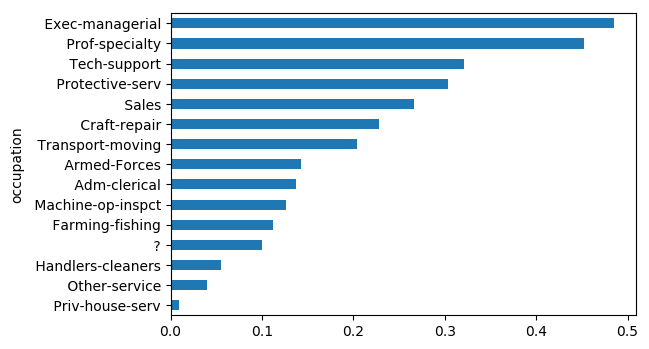

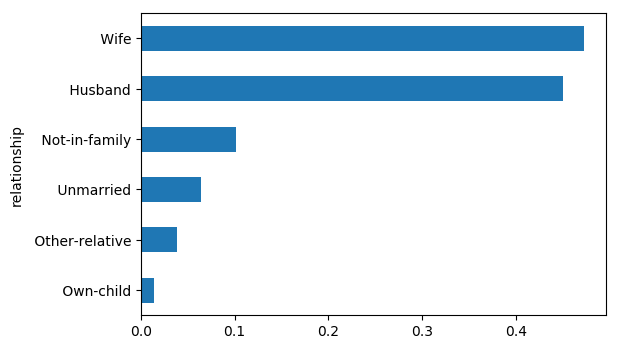

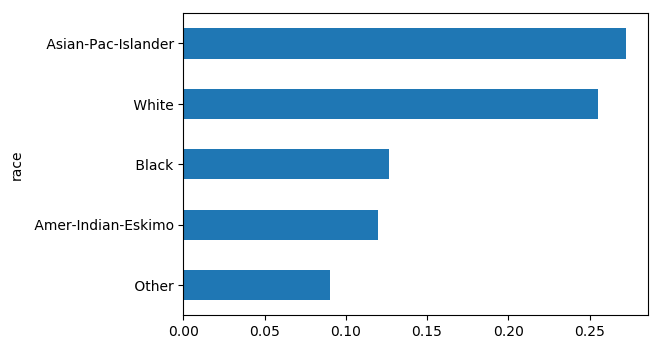

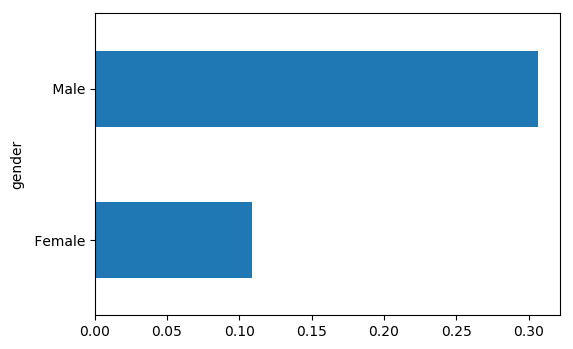

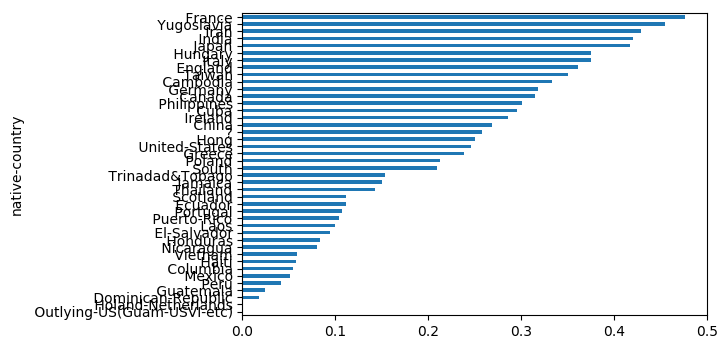

In [97]:
for column in categorical:
    plt.figure()
    income_train.groupby(data[column]).mean().sort_values().plot(kind="barh")

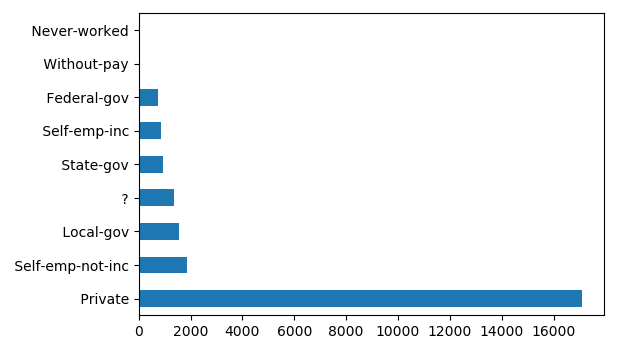

In [100]:
data_train.workclass.value_counts().plot(kind="barh")

In [101]:
data_train.workclass.value_counts()

 Private             17075
 Self-emp-not-inc     1870
 Local-gov            1552
 ?                    1369
 State-gov             953
 Self-emp-inc          855
 Federal-gov           727
 Without-pay            12
 Never-worked            7
Name: workclass, dtype: int64

In [102]:
data_train['native-country'].value_counts()

 United-States                 21828
 Mexico                          509
 ?                               442
 Philippines                     153
 Germany                         107
 Canada                           89
 Puerto-Rico                      87
 El-Salvador                      85
 India                            81
 England                          72
 Cuba                             71
 South                            67
 Jamaica                          60
 Dominican-Republic               57
 Italy                            56
 China                            56
 Vietnam                          51
 Japan                            48
 Poland                           47
 Guatemala                        41
 Taiwan                           40
 Columbia                         37
 Haiti                            35
 Iran                             35
 Portugal                         28
 Nicaragua                        25
 Peru                             24
 

In [110]:
data_train_cat_dummies = pd.get_dummies(data_train[categorical],
                                        columns=categorical)

In [111]:
cross_val_score(LogisticRegressionCV(), data_train_cat_dummies, income_train, cv=5, scoring="roc_auc")

array([ 0.881,  0.877,  0.884,  0.878,  0.878])

In [113]:
lr_cat = LogisticRegressionCV().fit(data_train_cat_dummies, income_train)

In [128]:
lr_cat.C_

array([ 2.783])

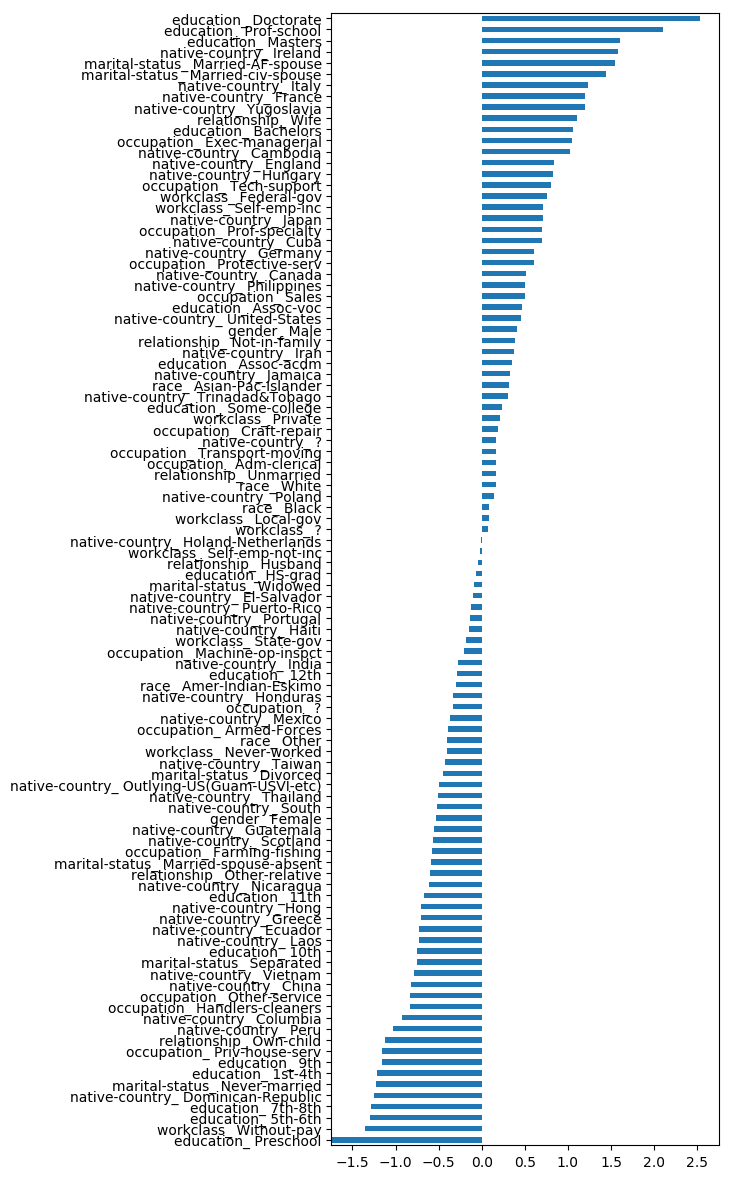

In [124]:
plt.figure(figsize=(5, 15))
coef = pd.Series(lr_cat.coef_.ravel(), index=data_train_cat_dummies.columns)
coef.sort_values().plot(kind="barh")

In [127]:
cross_val_score(LogisticRegressionCV(solver='liblinear', penalty='l1'),
                data_train_cat_dummies, income_train, cv=5, scoring="roc_auc")

array([ 0.88 ,  0.877,  0.884,  0.878,  0.877])

In [132]:
lrl1 = LogisticRegressionCV(solver='liblinear', penalty='l1').fit(data_train_cat_dummies, income_train)

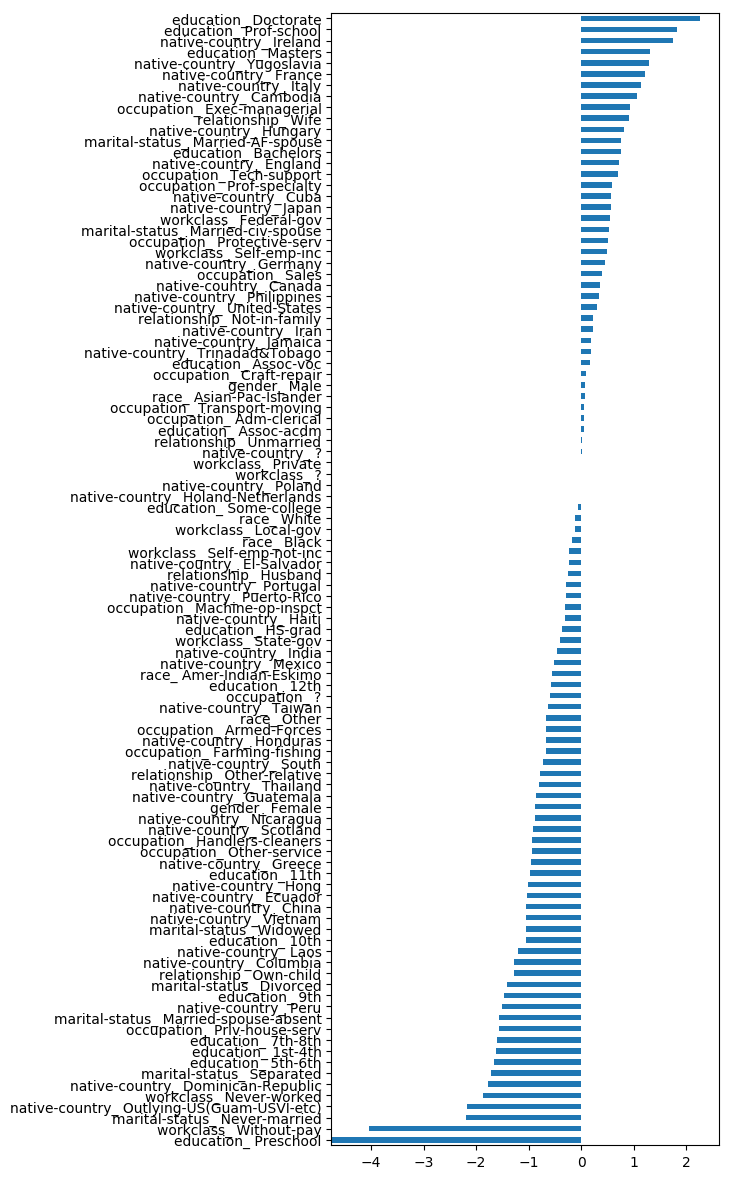

In [133]:
plt.figure(figsize=(5, 15))
coef = pd.Series(lrl1.coef_.ravel(), index=data_train_cat_dummies.columns)
coef.sort_values().plot(kind="barh")

In [134]:
data_train_dummies = pd.get_dummies(data_train)

In [149]:
log_pipe = make_pipeline(StandardScaler(), LogisticRegressionCV())
cross_val_score(log_pipe, data_train_dummies, income_train, cv=5, scoring="roc_auc")

array([ 0.909,  0.908,  0.912,  0.904,  0.901])

In [150]:
log_pipe.fit(data_train_dummies, income_train)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregressioncv', LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0))])

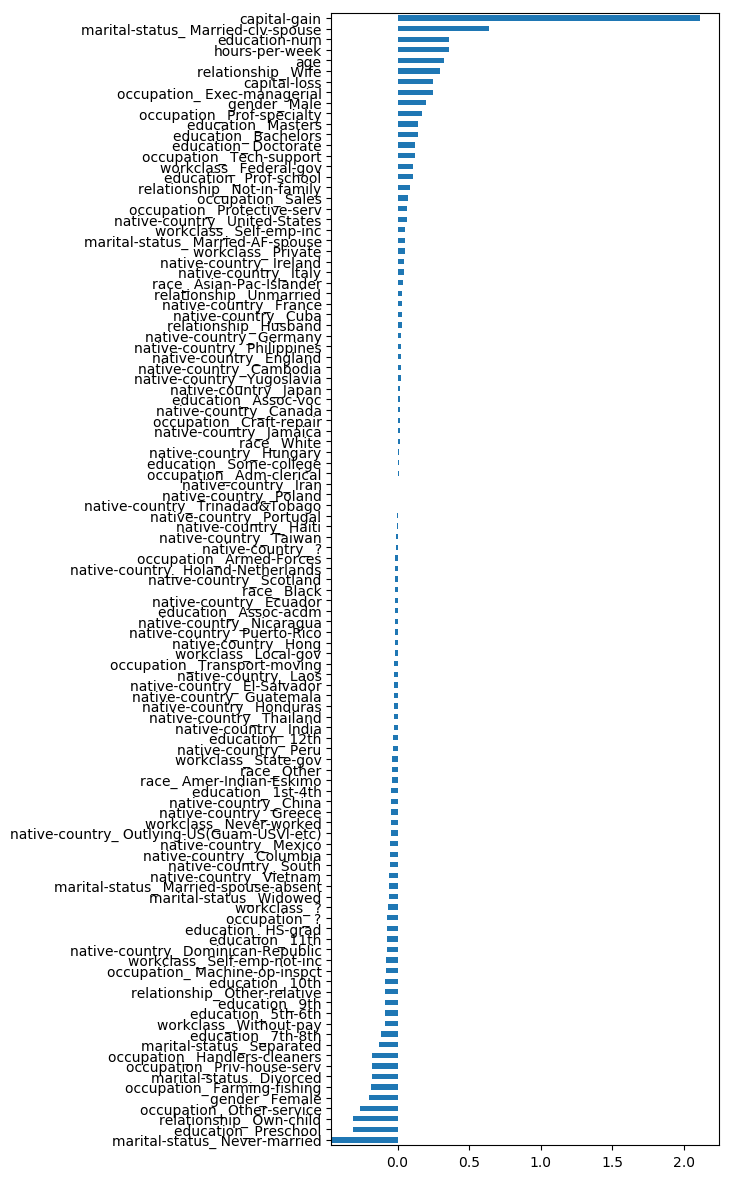

In [152]:
plt.figure(figsize=(5, 15))
coef = pd.Series(log_pipe.named_steps['logisticregressioncv'].coef_.ravel(), index=data_train_dummies.columns)
coef.sort_values().plot(kind="barh")

In [139]:
from sklearn.ensemble import RandomForestClassifier
cross_val_score(RandomForestClassifier(), data_train_dummies, income_train, cv=5, scoring="roc_auc")

array([ 0.873,  0.874,  0.876,  0.873,  0.854])

In [140]:
from sklearn.ensemble import RandomForestClassifier
cross_val_score(RandomForestClassifier(n_estimators=200), data_train_dummies, income_train, cv=5, scoring="roc_auc")

array([ 0.899,  0.894,  0.897,  0.894,  0.88 ])

In [141]:
cross_val_score(RandomForestClassifier(n_estimators=500), data_train_dummies, income_train, cv=5, scoring="roc_auc")

array([ 0.9  ,  0.896,  0.896,  0.895,  0.879])

In [143]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
tree = DecisionTreeClassifier().fit(data_train_dummies, income_train)

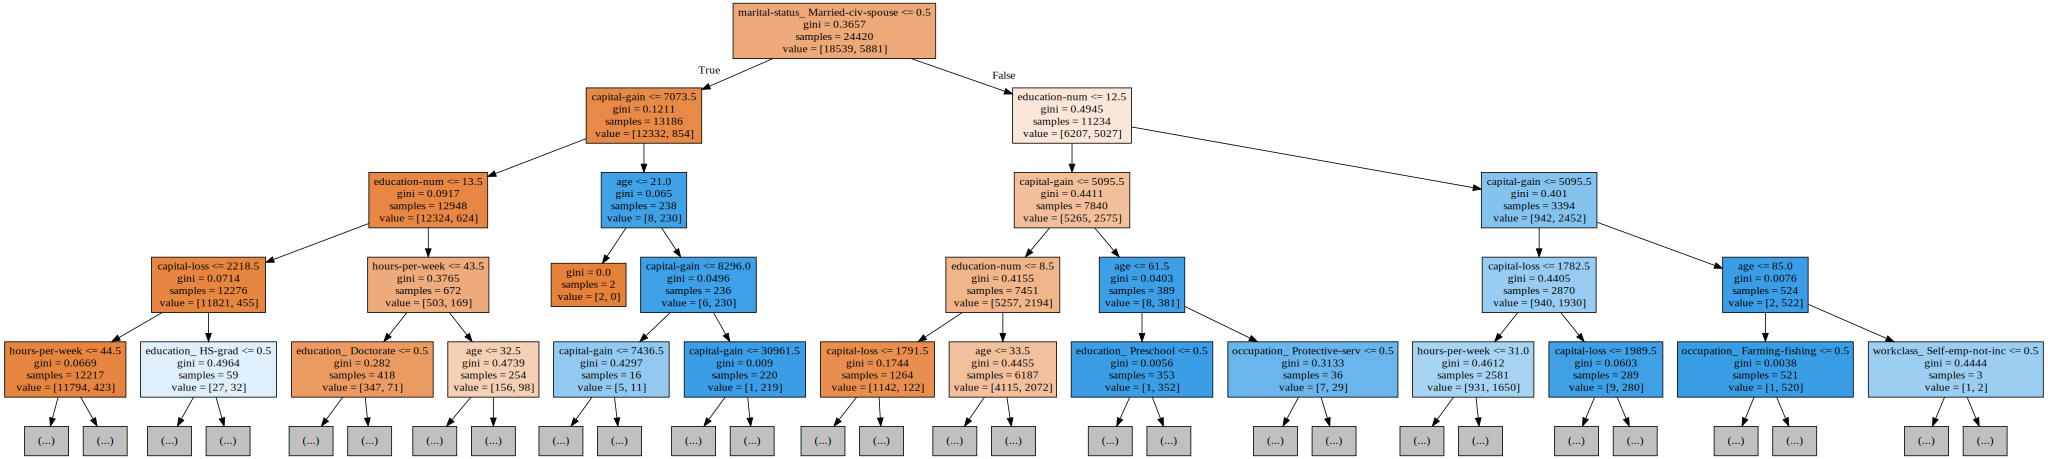

In [148]:
graphviz.Source(export_graphviz(tree, out_file=None, max_depth=4,
                                filled=True,
                                feature_names=data_train_dummies.columns))

In [155]:
from sklearn.kernel_approximation import Nystroem

approx = Nystroem(gamma=1./data_train_dummies.shape[1], n_components=300)
pipe_kernel = make_pipeline(StandardScaler(), approx, LogisticRegressionCV())


In [156]:
cross_val_score(pipe_kernel, data_train_dummies, income_train, cv=5, scoring="roc_auc")

array([ 0.906,  0.905,  0.903,  0.895,  0.892])

In [157]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp_pipe =  make_pipeline(StandardScaler(), mlp)
cross_val_score(pipe_kernel, data_train_dummies, income_train, cv=5, scoring="roc_auc")

array([ 0.905,  0.906,  0.904,  0.901,  0.892])

In [160]:
from sklearn.model_selection import GridSearchCV
param_grid = {'mlpclassifier__hidden_layer_sizes': [5, 10, 50, 100, 200]}
grid = GridSearchCV(mlp_pipe, param_grid, cv=5)

In [161]:
grid.fit(data_train_dummies, income_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('mlpclassifier', MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
 ...=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'mlpclassifier__hidden_layer_sizes': [5, 10, 50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [164]:
grid.best_score_

0.85352170352170353